# NAML project - Stroke prediction
###  Cavallini - Eusebio

Importing the libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Loading The Dataset

In this section, we load the dataset.

In [2]:
# Loading the stroke risk analysis dataset from a CSV file and stores it in a Pandas DataFrame called 'df'.
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
# Renaming the columns of the DataFrame 'df' using a predefined list of new column names.
new_cols = ["id", "gender", "age", "hypertension", "heart-disease", "ever-married", "work-type", "Residence-type", "avg-glucose-level", "bmi", "smoking-status", "stroke"]

# Defining the features of the dataset by categorizing them into three lists:
# - 'cathegorical_features' for categorical variables,
# - 'binary_features' for binary variables,
# - 'numerical_features' for continuous numerical variables.
cathegorical_features = ['work-type', 'smoking-status']
binary_features = ['hypertension', 'heart-disease', 'gender', 'ever-married', 'Residence-type']
numerical_features = ['age', 'avg-glucose-level', 'bmi']

df.columns = new_cols

In [4]:
df.head()

,id,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Removing the 'id' column from the DataFrame 'df' as it is not useful for the analysis.
df.drop('id', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart-disease      5110 non-null   int64  
 4   ever-married       5110 non-null   object 
 5   work-type          5110 non-null   object 
 6   Residence-type     5110 non-null   object 
 7   avg-glucose-level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking-status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


# Exploratory Data Analysis

## Data Cleaning

The first step we do in the data cleaning process is to check for any missing values.

In [7]:
# Checkig for missing values in the DataFrame by counting the number of NaN (Not a Number) values in each column.
# This helps in identifying any data quality issues that need to be addressed.
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart-disease,0
ever-married,0
work-type,0
Residence-type,0
avg-glucose-level,0
bmi,201
smoking-status,0


As we can clearly see, the BMI column presents some null values that we want to remove to guarantee data quality.
In many cases, since the number of null values is high compared to the total number of samples, data imputation can be a viable option and in fact, this is what we have done in the other notebook.

In [8]:
# Removing all rows in the DataFrame that contain any null (NaN) values.
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart-disease,0
ever-married,0
work-type,0
Residence-type,0
avg-glucose-level,0
bmi,0
smoking-status,0


Since in the paper is clearly stated that only the participants above 18 years old were considered, we proceed to remove the patients below 18 years old.

In [10]:
# Filtering the DataFrame to include only rows where the 'age' column is 18 or older.
df = df[df['age'] >= 18]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4073 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4073 non-null   object 
 1   age                4073 non-null   float64
 2   hypertension       4073 non-null   int64  
 3   heart-disease      4073 non-null   int64  
 4   ever-married       4073 non-null   object 
 5   work-type          4073 non-null   object 
 6   Residence-type     4073 non-null   object 
 7   avg-glucose-level  4073 non-null   float64
 8   bmi                4073 non-null   float64
 9   smoking-status     4073 non-null   object 
 10  stroke             4073 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 381.8+ KB


We filter out also participants whose gender and smoking status are, respectively, 'Other' and 'Unknown'. This to reduce the uncertainty in the data and also because it was done the same in the paper. However, the 'Unknown' category accounts for a significant percentage of participants who have had a stroke so, removing it, could lead to a loss of information.

In [11]:
# Counts the number of stroke cases where the 'smoking-status' is recorded as 'Unknown'.
unknown_smokers_stroke = df[(df['smoking-status'] == 'Unknown') & (df['stroke'] == 1)].shape[0]
# Counts the total number of stroke cases in the dataset.
stroke_count = df[df['stroke'] == 1].shape[0]

In [12]:
# Calculates and prints the percentage of stroke cases where the 'smoking-status' is 'Unknown'
# relative to the total number of stroke cases.
print(f"Number of unknown smoking status people who had a stroke: {unknown_smokers_stroke/stroke_count*100:.2f}%")

Number of unknown smoking status people who had a stroke: 13.46%


From this stat, we can see that the 'Unknown' category accounts for 13.46% of the stroke cases. This is a significant percentage and we should be careful in removing it.

In [13]:
# Filtering the DataFrame to exclude rows where the 'smoking-status' is recorded as 'Unknown'.
# This operation removes any records with an unknown smoking status from the dataset.
df = df[df['smoking-status'] != 'Unknown']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3256 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3256 non-null   object 
 1   age                3256 non-null   float64
 2   hypertension       3256 non-null   int64  
 3   heart-disease      3256 non-null   int64  
 4   ever-married       3256 non-null   object 
 5   work-type          3256 non-null   object 
 6   Residence-type     3256 non-null   object 
 7   avg-glucose-level  3256 non-null   float64
 8   bmi                3256 non-null   float64
 9   smoking-status     3256 non-null   object 
 10  stroke             3256 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.2+ KB


In [14]:
# Filtering the DataFrame to exclude rows where the gender is recorded as 'Other'.
# This operation removes any records with 'Other' gender designation from the dataset.
df = df[df['gender'] != 'Other']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3255 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3255 non-null   object 
 1   age                3255 non-null   float64
 2   hypertension       3255 non-null   int64  
 3   heart-disease      3255 non-null   int64  
 4   ever-married       3255 non-null   object 
 5   work-type          3255 non-null   object 
 6   Residence-type     3255 non-null   object 
 7   avg-glucose-level  3255 non-null   float64
 8   bmi                3255 non-null   float64
 9   smoking-status     3255 non-null   object 
 10  stroke             3255 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.2+ KB


In [15]:
# Removing duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3255 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3255 non-null   object 
 1   age                3255 non-null   float64
 2   hypertension       3255 non-null   int64  
 3   heart-disease      3255 non-null   int64  
 4   ever-married       3255 non-null   object 
 5   work-type          3255 non-null   object 
 6   Residence-type     3255 non-null   object 
 7   avg-glucose-level  3255 non-null   float64
 8   bmi                3255 non-null   float64
 9   smoking-status     3255 non-null   object 
 10  stroke             3255 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.2+ KB


## Outliers

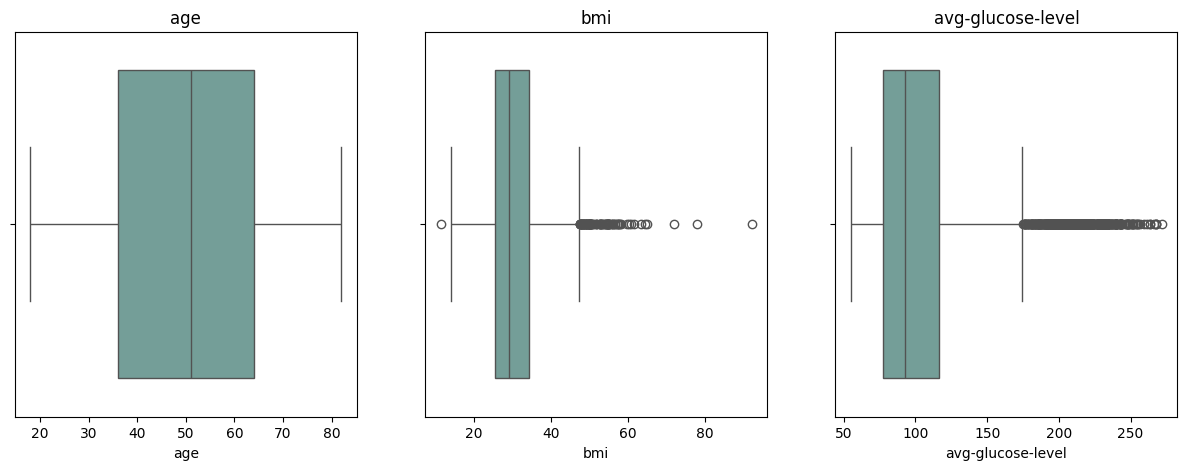

In [16]:
# Creating a series of box plots to visualize the distribution of three numerical features in the DataFrame.
# Each plot shows the distribution, median, quartiles, and potential outliers of the feature it represents.
# The features plotted are 'age', 'bmi', and 'avg-glucose-level'.
num_cols = ['age','bmi','avg-glucose-level']

plt.figure(figsize=(15, 5))
for i in range(3) :
    plt.subplot(1,3,i+1)

    sns.boxplot(x=df[num_cols[i]],color='#6DA59D')
    plt.title(num_cols[i])
plt.show()

In [17]:
print(df[df['bmi'] < 12])

     gender   age  hypertension  heart-disease ever-married work-type  \
2187   Male  40.0             0              0          Yes   Private   

     Residence-type  avg-glucose-level   bmi smoking-status  stroke  
2187          Rural              60.96  11.5   never smoked       0  


In the paper, the authors have removed the single lowest bmi value. We replicate the same procedure.

In [18]:
# Removing from the DataFrame the single lowest bmi value to include only rows where the bmi is greater than 12.
df = df[df['bmi'] > 12]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3254 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3254 non-null   object 
 1   age                3254 non-null   float64
 2   hypertension       3254 non-null   int64  
 3   heart-disease      3254 non-null   int64  
 4   ever-married       3254 non-null   object 
 5   work-type          3254 non-null   object 
 6   Residence-type     3254 non-null   object 
 7   avg-glucose-level  3254 non-null   float64
 8   bmi                3254 non-null   float64
 9   smoking-status     3254 non-null   object 
 10  stroke             3254 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.1+ KB


# Dataset Description

In [19]:
# pandas serie, it contains the number of '1' (stroke) and the number of '0' (no-stroke)
stroke_count =df['stroke'].value_counts()
# Calculating and printing the percentage of strokes in the dataset.
# The percentage is computed by dividing the number of strokes (value '1') by the total number of records (sum of strokes and non-strokes)
print("Stroke percentage: {:.2f}%".format(100 * (stroke_count[1] / (stroke_count[0] + stroke_count[1]))))

Stroke percentage: 5.53%


In [20]:
# The Series 'gender_count' contains the counts of 'Male' and 'Female'.
gender_count = df['gender'].value_counts()
# Printing the number of males and females in the dataset
print('Number of males: ', gender_count['Male'])
print('Number of females: ', gender_count['Female'])

Number of males:  1260
Number of females:  1994


In [21]:
# The Series 'hypertension_count' contains the counts of '0' (no hypertension) and '1' (hypertension).
hypertension_count =df['hypertension'].value_counts()
# Calculating and printing the percentage of records where 'hypertension' is 1 (indicating the presence of hypertension).
# The percentage is computed by dividing the count of hypertension cases (value '1') by the total number of records (sum of '0' and '1').
print("Hypertension percentage: {:.2f}%".format(100 *( hypertension_count[1]/(hypertension_count[0]+hypertension_count[1]))))

Hypertension percentage: 12.54%


In [22]:
# The Series 'heart_disease_count' contains the counts of '0' (no heart disease) and '1' (heart disease).
heart_disease_count =df['heart-disease'].value_counts()
# Calculating and printing the percentage of records where 'heart-disease' is 1 (indicating the presence of heart disease).
# The percentage is computed by dividing the count of heart disease cases (value '1') by the total number of records (sum of '0' and '1').
print("Hearth disease percentage: {:.2f}%".format(100 * (heart_disease_count[1]/(heart_disease_count[0]+heart_disease_count[1]))))

Hearth disease percentage: 6.33%


In [23]:
# The Series 'ever_married_count' contains the counts of 'No' (not married) and 'Yes' (married).
ever_married_count =df['ever-married'].value_counts()
# Calculating and printing the percentage of records where 'ever-married' is 'No' (indicating individuals who have never been married).
# The percentage is computed by dividing the count of 'No' cases by the total number of records (sum of 'No' and 'Yes'),
print("Married percentage: {:.2f}%".format(100 * (ever_married_count[0]/(ever_married_count[0]+ever_married_count[1]))))

Married percentage: 79.84%


<ipython-input-23-b0d439de66bb>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Married percentage: {:.2f}%".format(100 * (ever_married_count[0]/(ever_married_count[0]+ever_married_count[1]))))


In [24]:
# The Series 'work_type_count' contains the counts of different work types such as 'Private', 'Self-employed', 'Gov', and 'Never Worked'.
work_type_count =df['work-type'].value_counts()
# Calculating and printing the percentage of records for each work type
print("Private percentage: {:.2f}%".format(100 * (work_type_count[0]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Self-employed percentage: {:.2f}%".format(100 * (work_type_count[1]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Gov percentage: {:.2f}%".format(100 * (work_type_count[2]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Never Worked fraction: {:.1f}%".format(100 * (work_type_count[3]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))

Private percentage: 65.03%
Self-employed percentage: 19.21%
Gov percentage: 15.67%
Never Worked fraction: 0.1%


<ipython-input-24-5ea53de1ee14>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Private percentage: {:.2f}%".format(100 * (work_type_count[0]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
<ipython-input-24-5ea53de1ee14>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Self-employed percentage: {:.2f}%".format(100 * (work_type_count[1]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
<ipython-input-24-5ea53de1ee14>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always

In [25]:
# The Series 'residence_type_count' contains the counts of 'Urban' and 'Rural' residence types.
residence_type_count =df['Residence-type'].value_counts()
# Calculating and printing the percentage of individuals living in 'Urban' and 'Rural' areas
print("Urban percentage: {:.2f}%".format(100 * (residence_type_count['Urban']/(residence_type_count['Urban']+residence_type_count['Rural']))))
print("Rural pergentage: {:.2f}%".format(100 * (residence_type_count['Rural']/(residence_type_count['Urban']+residence_type_count['Rural']))))

Urban percentage: 51.14%
Rural pergentage: 48.86%


In [26]:
# The Series 'smoking_status_count' contains counts for the categories 'Never Smoked', 'Formerly Smoked', and 'Smokes'.
smoking_status_count =df['smoking-status'].value_counts()
# Calculating and printing the percentage of individuals in each smoking status category.
print("Never Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[0]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
print("Formely Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[1]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
print("Smokes fraction: {:.2f}%".format(100 * (smoking_status_count[2]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))

Never Smoked fraction: 52.64%
Formely Smoked fraction: 24.98%
Smokes fraction: 22.37%


<ipython-input-26-a7372076b87a>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Never Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[0]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
<ipython-input-26-a7372076b87a>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Formely Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[1]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
<ipython-input-26-a7372076b87a>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will al

The percentages calculated above perfectly reflect those in the paper.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3254 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3254 non-null   object 
 1   age                3254 non-null   float64
 2   hypertension       3254 non-null   int64  
 3   heart-disease      3254 non-null   int64  
 4   ever-married       3254 non-null   object 
 5   work-type          3254 non-null   object 
 6   Residence-type     3254 non-null   object 
 7   avg-glucose-level  3254 non-null   float64
 8   bmi                3254 non-null   float64
 9   smoking-status     3254 non-null   object 
 10  stroke             3254 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.1+ KB


In [28]:
df.head()

,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In this section, we present a series of visualizations that analyze the distribution and characteristics of the numerical features within our dataset. These plots help us to better understand the data and assess the overall trends before proceeding with more advanced modeling techniques.

We will examine key numerical variables such as age, BMI, and average glucose level, highlighting their respective distributions and any notable patterns. This analysis is crucial for ensuring the quality and integrity of our data, and it serves as a foundation for subsequent steps in our machine learning pipeline.

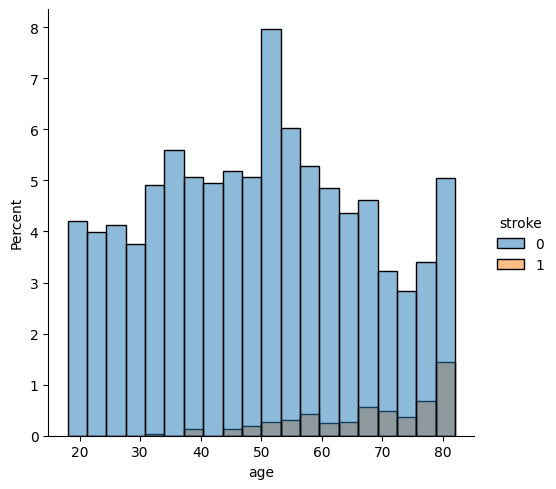

In [29]:
# Creating an histogram to visualize the distribution of the 'age' feature in the DataFrame.
# The histogram is segmented by the stroke variable, which means it shows separate distributions
# for individuals who have had a stroke (stroke=1) and those who have not (stroke=0).
sns.displot(data = df, x='age', hue='stroke',  bins=20, kde=False, color='blue', stat='percent')

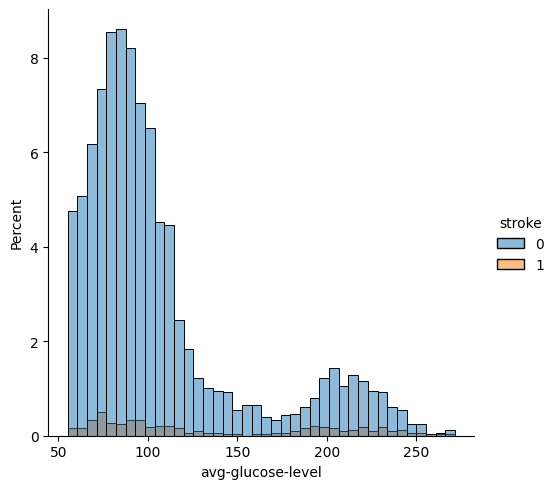

In [30]:
# This code generates an histogram plot to visualize the relationship
# between the average glucose level and the occurrence of stroke.
# The plot helps to visualize how the distribution of avg-glucose-level
# differs between individuals with and without a stroke.
sns.displot(data = df, x='avg-glucose-level', hue='stroke', bins=40, kde=False, color='blue', stat='percent')

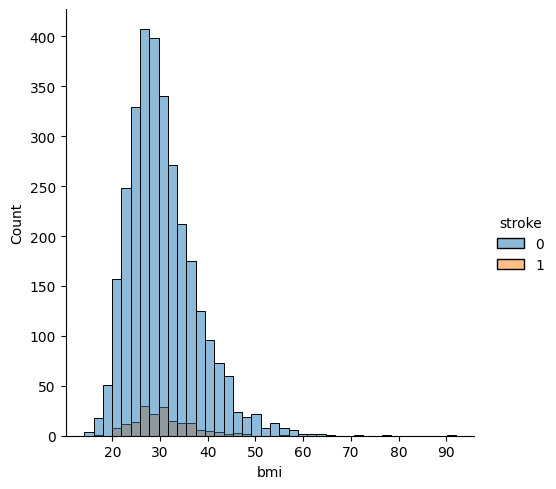

In [31]:
# This code generates an histogram to visualize the relationship
# between bmi and the occurrence of stroke.
# This plot helps to visualize the distribution of BMI values across
# individuals with and without a stroke, allowing for comparison of BMI patterns
# between the two groups.
sns.displot(data=df, x='bmi', hue='stroke', bins=40, kde=False, color='blue')

### Scatter Plot Analysis of Numerical Features

In this section, we use scatter plots to explore the relationships between pairs of numerical features in relation to stroke occurrence. By visualizing these relationships, we aim to uncover any potential patterns or correlations between the features and the likelihood of having a stroke. The scatter plots display how different numerical variables, such as age, BMI, and average glucose level, interact with each other and how these interactions relate to stroke status.
The scatter plots are color-coded based on stroke occurrence, which helps in distinguishing between individuals who experienced a stroke and those who did not. This visual representation aids in understanding whether certain combinations of feature values are associated with a higher or lower probability of stroke, and whether there are any noticeable trends or clusters in the data.

<Axes: xlabel='age', ylabel='avg-glucose-level'>

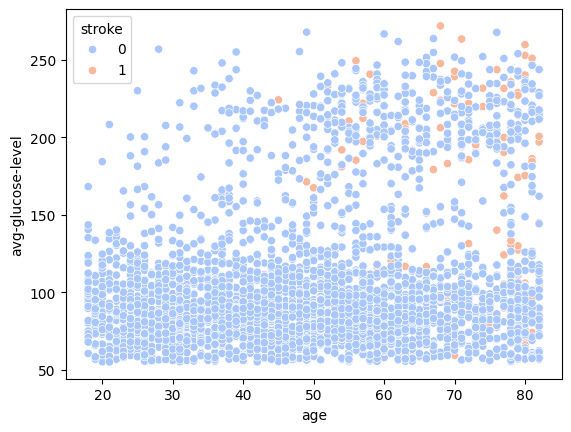

In [32]:
# Creating a scatter plot to visualize the relationship between age
# and average glucose level in relation to stroke occurrences.
sns.scatterplot(data=df, x='age', y='avg-glucose-level', hue='stroke', palette='coolwarm')

The scatter plot above helps to visually assess any potential relationship between a person's age, their average glucose level, and whether they experienced a stroke. The different colors make it easier to identify patterns or clusters associated with stroke occurrence.
From the graph, it is evident that there is a noticeable correlation between age and average glucose level. Specifically, higher values in both features are associated with a greater incidence of stroke cases. This visualization highlights how individuals with elevated age and glucose levels are more likely to experience a stroke, illustrating a significant relationship between these variables and stroke occurrence.

<Axes: xlabel='age', ylabel='bmi'>

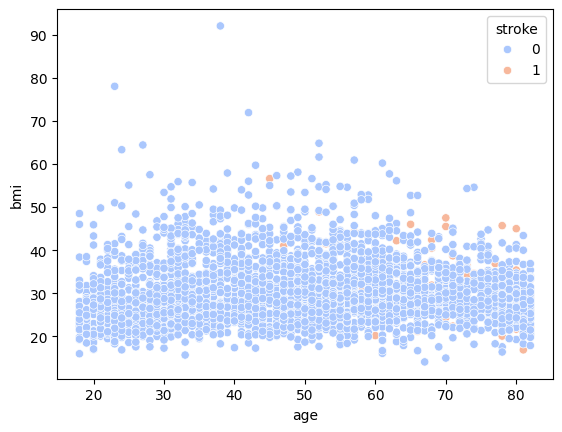

In [33]:
# Generating a scatter plot to explore the relationship between a person's age
# and bmi in relation to stroke occurrences.
sns.scatterplot(data=df, x='age', y='bmi', hue='stroke', palette='coolwarm')

The scatter plot above helps visualize any potential relationship between age, BMI, and the likelihood of having a stroke, with different colors indicating whether a stroke occurred.
From the graph, it is evident that stroke incidence is predominantly concentrated among elderly individuals with BMI values ranging between 35 and 50. This range represents individuals who are classified as obese. The plot highlights that a higher stroke occurrence is associated with both advanced age and higher BMI, suggesting a significant interplay between these factors and stroke risk.

<Axes: xlabel='bmi', ylabel='avg-glucose-level'>

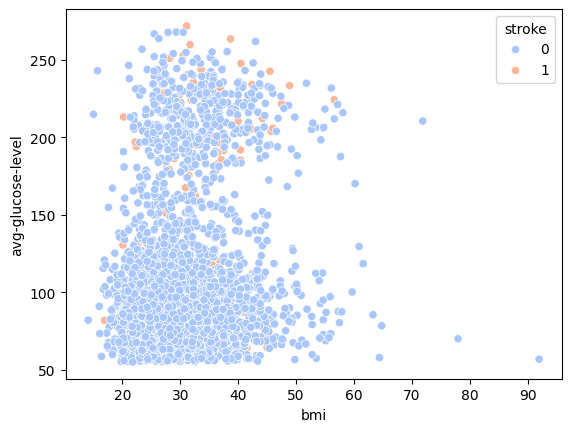

In [34]:
# Creating a scatter plot to visualize the relationship between bmi and
# average glucose level with respect to stroke occurrences.
sns.scatterplot(data=df, x='bmi', y='avg-glucose-level', hue='stroke', palette='coolwarm')

This last scatter plot helps to visualize how bmi and avg-glucose-level relate to stroke occurrence, allowing you to see if there are any patterns or correlations between these variables and stroke status.
Interestingly, the 25-40 bmi values(Overweight, Obese I) seems to be the range in which higher glucose levels are concentrated.

## Oversampling

In this section, we will examine whether there is any class imbalance in our dataset. Imbalanced datasets can severely impact the performance of machine learning algorithms, especially when the class distribution is skewed. In such cases, models tend to favor the majority class, resulting in poor predictive accuracy for the minority class.

If we identify an imbalance in our dataset, we will address it by applying the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE is a popular method for generating synthetic samples of the minority class, helping to balance the dataset and improve the model's ability to accurately predict both classes.

In [35]:
# Extracting feature names from the DataFrame, excluding the target column 'stroke'
features = np.array(df.columns[:-1])
print(features)

# Separating the features (X) from the target variable (y)
X = df.drop(['stroke'], axis = 1) # Drop the 'stroke' column to get the feature data
y = df['stroke'] # Assign the 'stroke' column to y as the target variable

['gender' 'age' 'hypertension' 'heart-disease' 'ever-married' 'work-type'
 'Residence-type' 'avg-glucose-level' 'bmi' 'smoking-status']


In [36]:
# Calculating and displaying the count of each category in the target
# variable 'stroke' allowing us to understand the distribution of the classes in the dataset.
y.value_counts()

,count
stroke,
0,3074
1,180


Now, we're going to generate a pie chart to visualize the proportions of the target variable in the dataset.
A pie chart can provide initial insights into the target variable's distribution, for example, if the chart shows that 'stroke' cases are much smaller in proportion compared to 'no stroke' cases, it highlights the need for techniques to handle class imbalance in modeling.

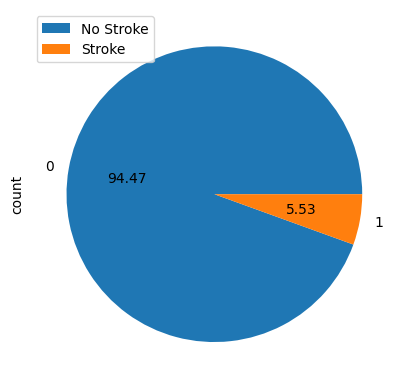

In [37]:
# Creating a pie chart to visualize the distribution of the target variable 'stroke'.
y.value_counts().plot.pie(autopct = "%.2f").legend(["No Stroke", "Stroke"])

We can observe a significant imbalance between the number of stroke and non-stroke samples in the dataset. This imbalance poses a challenge, as the model might become biased towards predicting the majority class (non-stroke) more frequently. To address this issue, we will apply oversampling techniques to increase the number of stroke samples, which represent the minority class, in order to balance the dataset and improve the model's performance.

In [38]:
X.head()

,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


To address the class imbalance in our dataset, we will apply the SMOTE (Synthetic Minority Over-sampling Technique) method. This technique requires that all features be numerical, so we first convert categorical features into numerical format using one-hot encoding.
Additionally, we will normalize the data to ensure that features with different scales do not disproportionately influence the model's performance.
It's important to note that unlike the original paper, which applied data augmentation solely to the training set, we have opted to augment the entire dataset. This approach helps to ensure a more balanced and representative model training process.

In [39]:
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.preprocessing import OrdinalEncoder, RobustScaler

X_tmp = X.copy()  # Create a copy of the feature matrix for preprocessing
y_tmp = y.copy()  # Create a copy of the target vector for preprocessing

# Convert binary features to categorical strings for easier one-hot encoding
X_tmp['hypertension'] = X_tmp['hypertension'].replace({0: 'No', 1: 'Yes'})
X_tmp['heart-disease'] = X_tmp['heart-disease'].replace({0: 'No', 1: 'Yes'})

# Define categorical features that will be one-hot encoded
features_one_hot_encoded  = cathegorical_features + binary_features


# Apply one hot encoding to the categorical features (and binary features)
dummies = pd.get_dummies(X_tmp[features_one_hot_encoded], prefix_sep='__')
dummies_columns = dummies.columns

# Drop original categorical and binary features and concatenate the one-hot encoded columns
X_tmp = X_tmp.drop(features_one_hot_encoded, axis=1)
X_tmp = pd.concat([X_tmp, dummies], axis=1)
tmp_features = X_tmp.columns

# Ensure that all one-hot encoded columns are integers
X_tmp[dummies_columns] = np.round(X_tmp[dummies_columns]).astype(int)

# Normalize the data using RobustScaler to mitigate the impact of outliers
scaler = RobustScaler()
X_tmp = scaler.fit_transform(X_tmp, y_tmp)

# Apply SMOTE to address class imbalance by generating synthetic samples
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_tmp, y_tmp)

# Inverse the normalization to bring the data back to its original scale
X_smote = scaler.inverse_transform(X_smote)

# Reconstruct the DataFrame from the transformed feature matrix
X_smote = pd.DataFrame(X_smote, columns=tmp_features)

# Convert the one-hot encoded columns back to boolean values
X_smote[dummies_columns] = np.round(X_smote[dummies_columns]).astype(bool)

# Inverse the one-hot encoding to revert to the original categorical format
dummies = pd.from_dummies(X_smote[dummies_columns], sep='__')
X_smote.drop(columns=dummies_columns, inplace=True)
X_smote = pd.concat([X_smote, dummies], axis=1)

# Display basic statistics of the resulting DataFrame
X_smote.describe()

,age,avg-glucose-level,bmi
count,6148.000000,6148.000000,6148.000000
mean,58.907040,121.853679,30.472921
std,17.132681,56.758075,6.378038
min,18.000000,55.120000,14.100000
25%,47.822252,79.359387,26.300000
50%,61.525139,98.057917,29.500000
75%,74.000000,169.143761,33.719665
max,82.000000,271.740000,92.000000


In [40]:
X_smote.head()

,age,avg-glucose-level,bmi,work-type,smoking-status,hypertension,heart-disease,gender,ever-married,Residence-type
0,67.0,228.69,36.6,Private,formerly smoked,No,Yes,Male,Yes,Urban
1,80.0,105.92,32.5,Private,never smoked,No,Yes,Male,Yes,Rural
2,49.0,171.23,34.4,Private,smokes,No,No,Female,Yes,Urban
3,79.0,174.12,24.0,Self-employed,never smoked,Yes,No,Female,Yes,Rural
4,81.0,186.21,29.0,Private,formerly smoked,No,No,Male,Yes,Urban


In [41]:
# The balanced dataset is saved in new variables (X_balanced and y_balanced) that will be used for plotting
X_balanced = X_smote.copy()
y_balanced = y_smote.copy()

# The original dataset variables (X and y) are redefined to hold the balanced dataset values
X = X_smote.copy()
y = y_smote.copy()

In [42]:
# Create a new DataFrame (df_balanced) from the balanced features (X_balanced)
df_balanced = X_balanced
# Add the target variable 'stroke' from the balanced target (y_balanced) to the DataFrame
df_balanced['stroke'] = y_balanced

df_balanced.head()

,age,avg-glucose-level,bmi,work-type,smoking-status,hypertension,heart-disease,gender,ever-married,Residence-type,stroke
0,67.0,228.69,36.6,Private,formerly smoked,No,Yes,Male,Yes,Urban,1
1,80.0,105.92,32.5,Private,never smoked,No,Yes,Male,Yes,Rural,1
2,49.0,171.23,34.4,Private,smokes,No,No,Female,Yes,Urban,1
3,79.0,174.12,24.0,Self-employed,never smoked,Yes,No,Female,Yes,Rural,1
4,81.0,186.21,29.0,Private,formerly smoked,No,No,Male,Yes,Urban,1


In [43]:
df_balanced.describe()

,age,avg-glucose-level,bmi,stroke
count,6148.000000,6148.000000,6148.000000,6148.000000
mean,58.907040,121.853679,30.472921,0.500000
std,17.132681,56.758075,6.378038,0.500041
min,18.000000,55.120000,14.100000,0.000000
25%,47.822252,79.359387,26.300000,0.000000
50%,61.525139,98.057917,29.500000,0.500000
75%,74.000000,169.143761,33.719665,1.000000
max,82.000000,271.740000,92.000000,1.000000


### Graphs

Now, we'll compare the distribution of the 'stroke' class between the original imbalanced dataset and the balanced dataset. A histogram will provide a clear visualization of these distributions, highlighting the effect of the balancing process.

<Axes: xlabel='stroke', ylabel='count'>

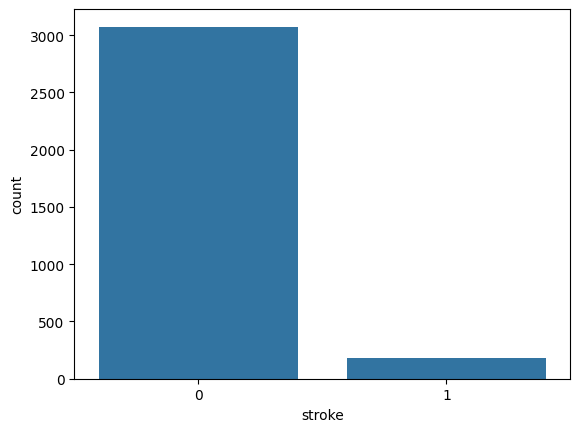

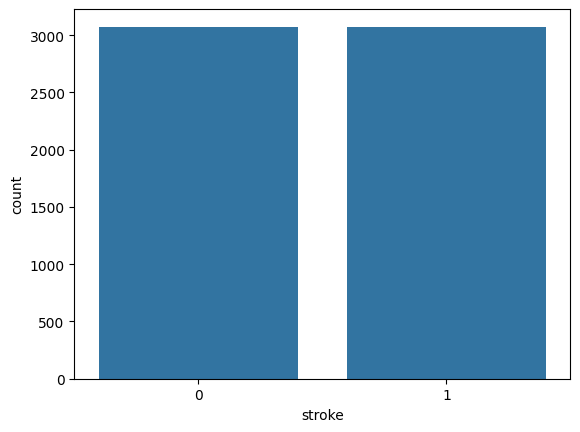

In [44]:
# Plot a countplot to visualize the distribution of the 'stroke' class in the original dataset (df)
sns.countplot(x='stroke', data=df)
plt.figure()
# Plot a countplot to visualize the distribution of the 'stroke' class in the balanced dataset (df_balanced)
sns.countplot(x='stroke', data=df_balanced)

As we can see, the balancing process has effectively equalized the two classes. The number of participants who have had a stroke now matches the number of those who haven't, demonstrating the success of the balancing technique.

### Scatter Plot Analysis of Numerical Features in the Imbalanced Dataset

Now, we will use scatter plots again to explore the relationships between pairs of numerical features concerning stroke occurrence, but this time, within the balanced dataset.

<Axes: xlabel='bmi', ylabel='avg-glucose-level'>

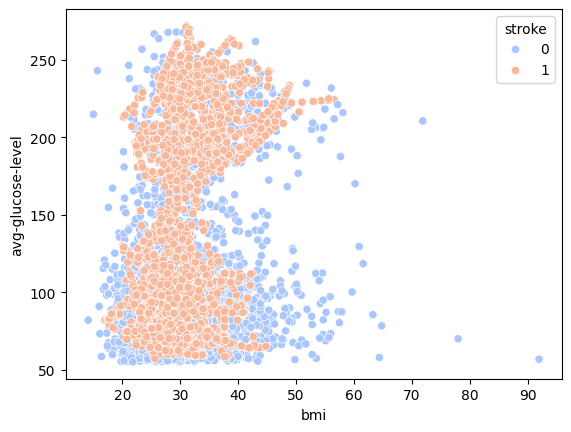

In [45]:
# Create a scatter plot to visualize the relationship between 'bmi' and 'avg-glucose-level' in the balanced dataset.
sns.scatterplot(data=df_balanced, x='bmi', y='avg-glucose-level', hue='stroke', palette='coolwarm')

<Axes: xlabel='age', ylabel='bmi'>

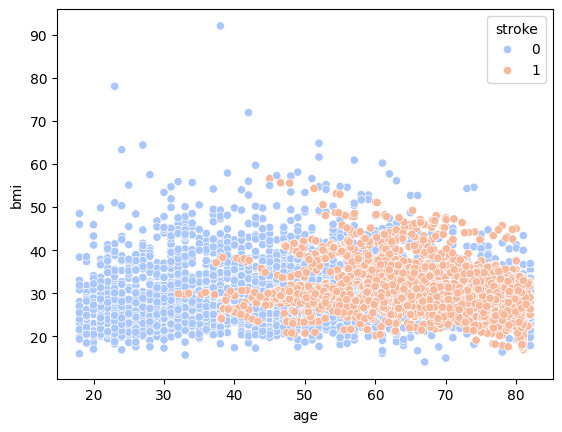

In [46]:
# Create a scatter plot to visualize the relationship between 'age' and 'bmi' in the balanced dataset
sns.scatterplot(data=df_balanced, x='age', y='bmi', hue='stroke', palette='coolwarm')

<Axes: xlabel='age', ylabel='avg-glucose-level'>

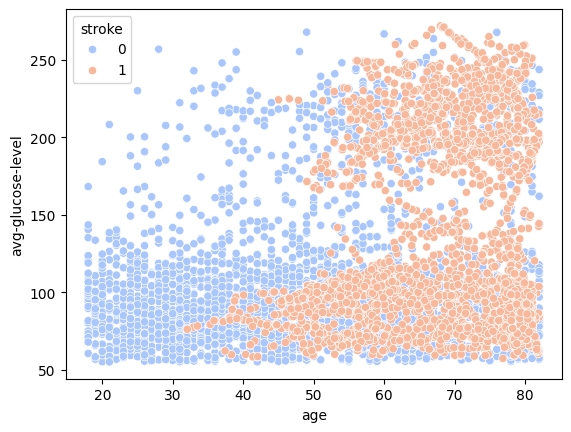

In [47]:
# Create a scatter plot to visualize the relationship between 'age' and 'avg-glucose-level' in the balanced dataset.
sns.scatterplot(data=df_balanced, x='age', y='avg-glucose-level', hue='stroke', palette='coolwarm')

We can clearly see that the dataset is now balanced. The stroke and non-stroke patients are now equally represented in the dataset.

# Graphs

## Feature Distribution Histograms in the Balanced Dataset.

<Axes: xlabel='age_bucket', ylabel='percent'>

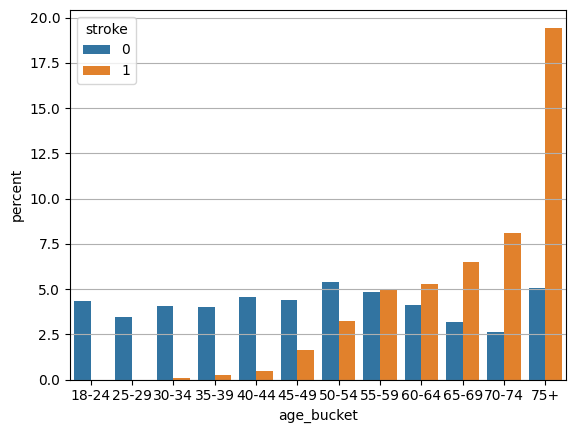

In [48]:
plt.grid()
# Define age buckets with corresponding labels
age_labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+']
# Create a copy of the balanced dataset
dataset_bal_copy = df_balanced.copy()
# Bin the 'age' column into categorical age buckets and add this as a new column 'age_bucket'
dataset_bal_copy['age_bucket'] = pd.cut(dataset_bal_copy['age'], bins=[17, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 100], labels=age_labels)
# Plot a count plot showing the percentage of stroke occurrences across different age buckets
# in the balanced dataset.
sns.countplot(x='age_bucket', hue='stroke', order=age_labels, data=dataset_bal_copy, stat='percent')

The plot above illustrates the participants' distribution in each class in terms of the age group that they belong to in the balanced dataset. As in the original paper, focusing on the stroke class, a significant percentage of the participants are older than 74 years, wherease the second, most frequently occurring age group is 70-74. In addition, we can see that stroke mainly concerns elderly people.

In [49]:
mask = np.logical_and(df['stroke'] == 1, df['age'] >= 70)
stroke_eldery = df[mask]['age'].value_counts().sum()
print("Probability of stroke after 70y/o is {:.2f}%".format(100 *stroke_eldery/stroke_count[1]))

Probability of stroke after 70y/o is 53.89%


As also observed in the paper, the number of elderly patients who had a stroke is higher than the number of young patients who had a stroke.

<Axes: xlabel='hypertension', ylabel='percent'>

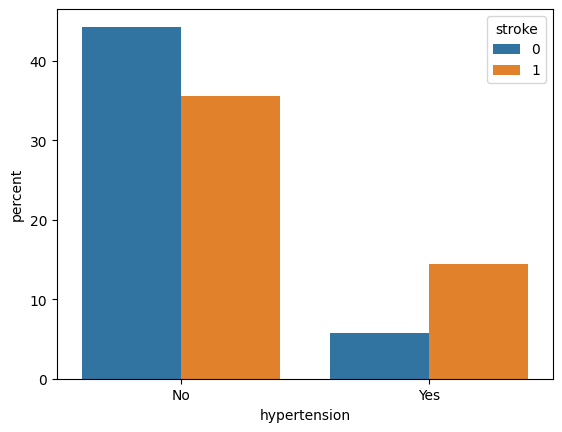

In [50]:
# Plot a count plot showing the percentage distribution of stroke occurrences by hypertension status
# in the balanced dataset.
sns.countplot(x='hypertension', hue='stroke', data=df_balanced, stat='percent')

This plot illustrates the percentage distribution of stroke occurrences in relation to hypertension status. It shows how the prevalence of stroke varies between individuals with and without hypertension. As in the original paper, we observe that an essential ratio of participants who had a stroke has not been diagnosed with hypertension.

<Axes: xlabel='heart-disease', ylabel='percent'>

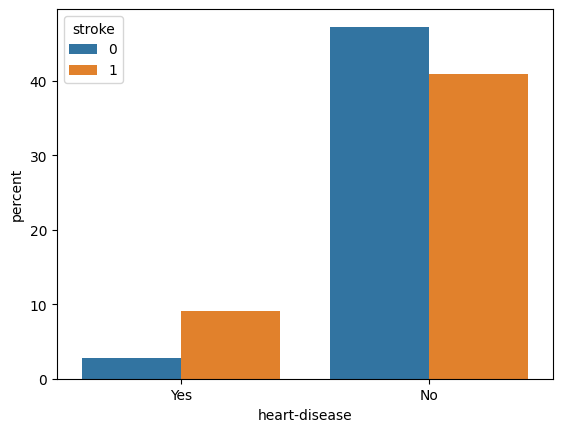

In [51]:
# Generate a count plot to illustrate the percentage distribution of stroke occurrences based on heart disease status
# in the balanced dataset.
sns.countplot(x='heart-disease', hue='stroke', data=df_balanced, stat='percent')

This plot illustrates the percentage distribution of stroke occurrences in relation to heart disease. It shows how the prevalence of stroke varies between individuals with and without a heart disease. As in the original paper, we observe that an essential ratio of participants who had a stroke has not been diagnosed with an heart disease.

The fact that both the heart disease class and the hypertension seem not to contribute significantly to the model is also observed in the paper. The authors explain it as a possible consequence of the lack of screening. When these simptoms are not found, they can not be acted on.

<Axes: xlabel='smoking-status', ylabel='percent'>

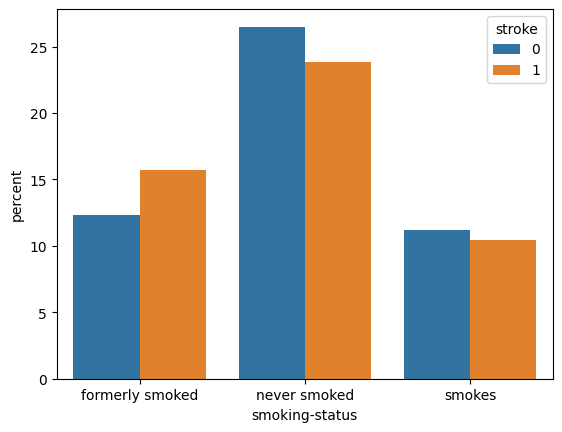

In [52]:
# Generate a count plot to show the percentage distribution of stroke occurrences based on smoking status
# in the balanced dataset.
sns.countplot(x='smoking-status', hue='stroke', data=df_balanced, stat='percent')

The plot above depicts the participants' distribution among the three categories of smoking habits.

<Axes: xlabel='bmi_bucket', ylabel='percent'>

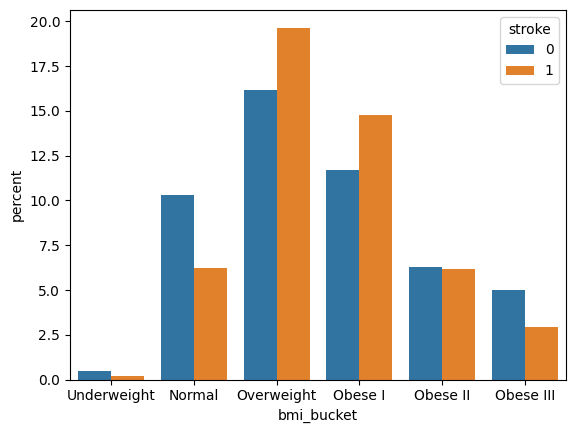

In [53]:
# Define the BMI categories with corresponding labels
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
# Create a new column 'bmi_bucket' in the dataset that categorizes BMI values into the defined BMI ranges
dataset_bal_copy['bmi_bucket'] = pd.cut(dataset_bal_copy['bmi'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, 100], labels=bmi_labels)
# Generate a count plot that shows the percentage of stroke occurrences within each BMI category
sns.countplot(x='bmi_bucket', hue='stroke',order=bmi_labels,  data=dataset_bal_copy, stat='percent')

The BMI plot suggests that most of the patients that had suffered from a stroke are either overweight or obese.
The importance of BMI is also captured by the ranking score assigned by the selected feature importance method in the balanced data.

<Axes: xlabel='Residence-type', ylabel='percent'>

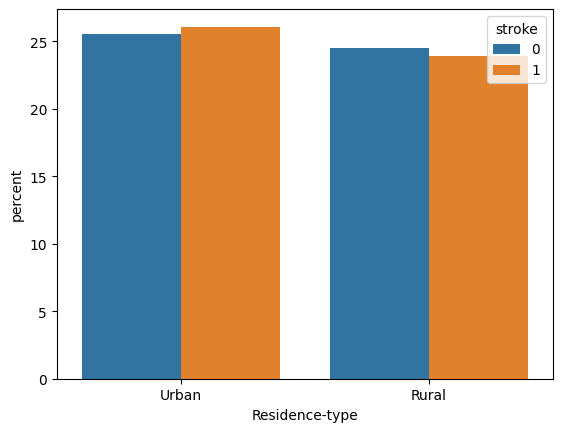

In [54]:
# Generate a count plot that shows the percentage of stroke occurrences based on the type of residence
# in the balanced dataset.
sns.countplot(x='Residence-type', hue='stroke', data=df_balanced, stat='percent')

The urban residence seems to be more common among the patients that had a stroke. Although the difference is not very significant.

<Axes: xlabel='work-type', ylabel='percent'>

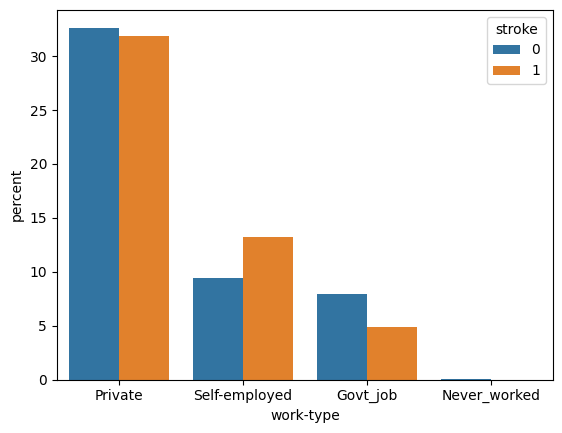

In [55]:
# Generate a count plot that shows the percentage of stroke occurrences based on different types of work
# in the balanced dataset.
sns.countplot(x='work-type', hue='stroke', data=df_balanced, stat='percent')

As observed in the paper, the private sector seems to have a higher percentage of stroke patients. However, we should also point out that the private sector also has a higher representation in the dataset.

<Axes: xlabel='gender', ylabel='percent'>

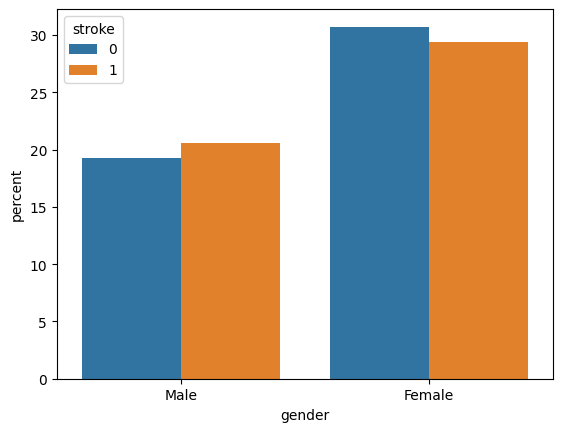

In [56]:
# Generate a count plot that shows the percentage of stroke occurrences based on gender
# in the balanced dataset.
sns.countplot(x='gender', hue='stroke', data=df_balanced, stat='percent')

The graphs visualized so far are similar to the ones in the paper. This indicatest that the data pre-processing was done correctly.

## Feature Ranking

In classification analysis, feature importance constitutes a core component that facilitates the development of accurate and high-fidelity ML models. The accuracy of the classifiers improves until an optimal number of features is considered. The performance of ML models may deteriorate if irrelevant features are assumed for the models' training. Feature ranking is defined as the process of assigning a score to each feature in a dataset. In this way, the most significant or relevant ones are considered, namely, those ones that may contribute greatly to the target variable to enhance the model accuracy.

Before training the classifiers, we will split the data in the training e test sets.

In [57]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
# X_train and y_train will contain 80% of the data, used for training the model
# X_test and y_test will contain the remaining 20% of the data, used for testing the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [58]:
X_train.head()

,age,avg-glucose-level,bmi,work-type,smoking-status,hypertension,heart-disease,gender,ever-married,Residence-type
1855,40.000000,83.300000,32.000000,Private,smokes,No,No,Female,Yes,Rural
2475,58.000000,96.210000,23.500000,Private,never smoked,No,No,Female,Yes,Urban
2640,80.000000,73.870000,33.700000,Self-employed,never smoked,No,No,Female,Yes,Urban
4180,65.654655,229.811227,28.267187,Private,never smoked,No,No,Male,Yes,Rural
4049,81.486573,193.206919,29.000000,Private,formerly smoked,No,No,Male,Yes,Urban


### Random forest classifier to select the most important features

We start with the pre-processing part, in which we one-hot encode the categorical features and scale the numerical ones.

In [59]:
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, MinMaxScaler

# Make a copy of the original data to avoid modifying the original dataset
X_tmp = X.copy()
y_tmp = y.copy()

# Combine categorical and binary features to prepare for one hot encoding
features_one_hot_encoded = cathegorical_features + binary_features

# Apply one hot encoding to the categorical and binary features
dummies = pd.get_dummies(X_tmp[features_one_hot_encoded]) # Convert categorical variables into dummy/indicator variables
X_tmp = X_tmp.drop(features_one_hot_encoded, axis=1)  # Drop the original categorical and binary features
X_tmp = pd.concat([X_tmp, dummies], axis=1) # Concatenate the dummy variables to the original dataset

# Save the feature names after one hot encoding
tmp_features = X_tmp.columns

# Normalize the numerical features using MinMaxScaler (scales features to a range between 0 and 1)
scaler = MinMaxScaler()
X_tmp[numerical_features] = scaler.fit_transform(X_tmp[numerical_features])

We will now proceed with training the Random Forest classifier, a powerful ensemble learning method that combines multiple decision trees to improve prediction accuracy and control overfitting. By aggregating the predictions of these trees, the Random Forest model provides a robust and reliable estimate of feature importance, helping us to better understand the key factors influencing our target variable.

{'ever-married': 0.02597079937579072, 'heart-disease': 0.026703183604079982, 'gender': 0.03296645446140689, 'hypertension': 0.038147447165389356, 'Residence-type': 0.03862614179996609, 'work-type': 0.04702895054057292, 'smoking-status': 0.05186994137613539, 'bmi': 0.1618171466102235, 'avg-glucose-level': 0.20906884651275598, 'age': 0.367801088553679}


<BarContainer object of 10 artists>

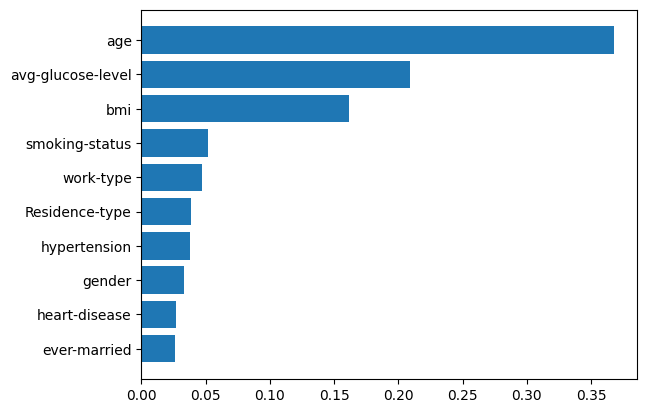

In [60]:
from sklearn.ensemble import RandomForestClassifier

dataset_features = df.columns[:-1]

# Initialize the Random Forest Classifier with a fixed random state
rf_classifier = RandomForestClassifier(random_state=42)

importances = dict()  # Create an empty dictionary to store feature importances
for f in dataset_features:
    importances[f] = 0  # Initialize importance score to 0 for each feature

rf_classifier.fit(X_tmp, y_tmp) # Train the Random Forest classifier on the preprocessed data

# Get the importance scores of each feature and zip them with their respective feature names
feature_importance = list(zip(tmp_features, rf_classifier.feature_importances_))

# This loop iterates through each feature in the original dataset and adds up the importance scores
# for that feature across all one-hot encoded columns that correspond to it.
for f in dataset_features:
    for f2, imp in feature_importance:
        if f in f2:
            importances[f] += imp

# Sort the features by their importance scores in ascending order
importances = dict(sorted(importances.items(), key=lambda item: item[1]))
print(importances)
# Plot a horizontal bar chart to visualize the feature importances
plt.barh([k for k, _ in importances.items()],[v for _, v in importances.items()])

We also compute feature ranking using a Mutual Information classifier, which evaluates the statistical dependency between each feature and the target variable. This method quantifies how much information each feature contributes to predicting the target, providing insight into the relevance and importance of each feature in the model. By assessing these dependencies, we can identify which features have the strongest association with the target variable, guiding feature selection and improving model performance.

{'gender': 0.0, 'Residence-type': 0.011388084703597645, 'smoking-status': 0.014418478286612357, 'work-type': 0.025907481215462047, 'ever-married': 0.02830711932130292, 'hypertension': 0.03855648318661187, 'heart-disease': 0.03861650258607008, 'avg-glucose-level': 0.058215724453670736, 'bmi': 0.4121469995914324, 'age': 0.5249461852631108}


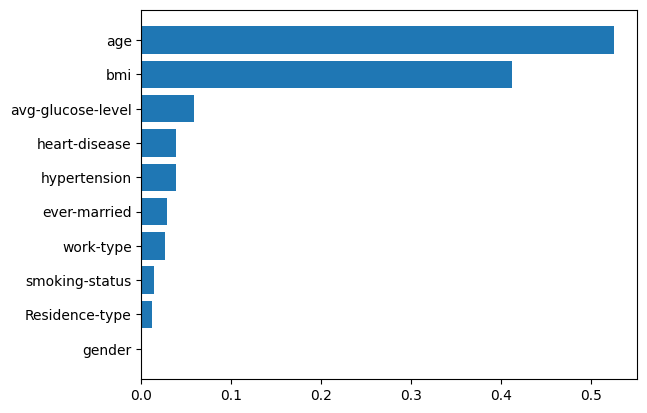

In [61]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

# Compute the mutual information between each feature and the target variable.
# Mutual information measures the dependency between the feature and the target.
mi = mutual_info_classif(X_tmp, y_tmp, random_state=42)

# Combine the feature names with their corresponding mutual information scores.
feature_importance = list(zip(tmp_features, mi))

# Initialize a dictionary to store the cumulative importance for each original feature.
importances = dict()
for f in dataset_features:
    importances[f] = 0

# This loop iterates through each feature in the original dataset and adds up the mutual information scores
# for that feature across all one-hot encoded columns that correspond to it.
for f in dataset_features:
    for f2, imp in feature_importance:
        if f in f2:
            importances[f] += imp

# Sort the feature importance dictionary by the importance values in ascending order.
importances = dict(sorted(importances.items(), key=lambda item: item[1]))
# Create a horizontal bar plot to visualize the importance of each feature.
plt.barh([k for k, _ in importances.items()],[v for _, v in importances.items()])
print(importances)

Now, we will train a Decision Tree Classifier to implement the information gain method, which is used to evaluate and rank the importance of features in predicting the target variable. By examining the reduction in entropy (or uncertainty) at each split, the model identifies which features contribute most to accurate classification, allowing us to understand the relative significance of each feature in the dataset.

{'heart-disease': 0.007258802146421495, 'ever-married': 0.009128022300440063, 'hypertension': 0.021185820719785132, 'Residence-type': 0.029882583467669838, 'gender': 0.03244520200974377, 'work-type': 0.037388838718481865, 'smoking-status': 0.037815349229904885, 'bmi': 0.11653425734800146, 'avg-glucose-level': 0.14773266913840596, 'age': 0.5606284549211457}


<BarContainer object of 10 artists>

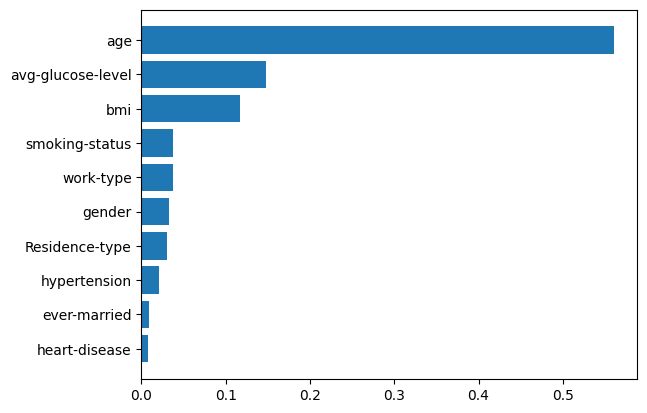

In [62]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier with 'entropy' as the criterion for measuring the quality of a split.
dt_classifier = DecisionTreeClassifier(criterion='entropy')

# Create a dictionary to store the cumulative feature importance for each feature in the dataset.
importances = dict()
for f in dataset_features:
    importances[f] = 0

# Fit the Decision Tree classifier on the training data.
dt_classifier.fit(X_tmp, y_tmp)

# Extract the feature importance scores from the trained Decision Tree model,
# and zip them with their corresponding feature names.
feature_importance = list(zip(tmp_features, dt_classifier.feature_importances_))

# This loop iterates through each feature in the original dataset and adds up the importance scores
# for that feature across all one-hot encoded columns that correspond to it.
for f in dataset_features:
    for f2, imp in feature_importance:
        if f in f2:
            importances[f] += imp

# Sort the feature importance dictionary by the importance values in ascending order.
importances = dict(sorted(importances.items(), key=lambda item: item[1]))
print(importances)
# Create a horizontal bar plot to visualize the importance of each feature.
plt.barh([k for k, _ in importances.items()],[v for _, v in importances.items()])

Both the Random Forest and the Information Gain method  show that age is the the most influent and relevant risk factor for the occurrence of stroke. This is consistent with the paper. Both feature ranking algorithms seem to agree on the importance of BMI and glucose level.
Moreover, all scores are positive, which means that the features may enhance the models' performance.

## Model training


In this section, we will train the models used in the classification framework for predicting stroke occurrence, as outlined in the referenced paper. We will then compute key evaluation metrics, including Precision, Recall, F-Measure, AUC, and Accuracy, which are widely recognized in the relevant literature for assessing model performance.

In [63]:
# Initialize a dictionary to store confusion matrices for each model.
confusion_matrices = dict()

# Initialize a dictionary to store the mean cross-validation scores for each model.
cross_val_scores_mean = dict()

# Initialize a dictionary to store the accuracy scores for each model.
accuracy = dict()

# Initialize a dictionary to store the precision scores for each model.
precision = dict()

# Initialize a dictionary to store the recall scores for each model.
recall = dict()

# Initialize a dictionary to store the F1 scores (F-measure) for each model.
F_metric = dict()

# Initialize a dictionary to store the AUC (Area Under the Curve) scores for each model.
auc_score = dict()

In [64]:
print(X_train.shape)
X_train.head()

(4918, 10)


,age,avg-glucose-level,bmi,work-type,smoking-status,hypertension,heart-disease,gender,ever-married,Residence-type
1855,40.000000,83.300000,32.000000,Private,smokes,No,No,Female,Yes,Rural
2475,58.000000,96.210000,23.500000,Private,never smoked,No,No,Female,Yes,Urban
2640,80.000000,73.870000,33.700000,Self-employed,never smoked,No,No,Female,Yes,Urban
4180,65.654655,229.811227,28.267187,Private,never smoked,No,No,Male,Yes,Rural
4049,81.486573,193.206919,29.000000,Private,formerly smoked,No,No,Male,Yes,Urban


In [65]:
print(X_test.shape)
X_test.head()

(1230, 10)


,age,avg-glucose-level,bmi,work-type,smoking-status,hypertension,heart-disease,gender,ever-married,Residence-type
614,54.000000,90.920000,29.100000,Private,never smoked,No,No,Female,Yes,Rural
565,59.000000,73.750000,27.300000,Govt_job,smokes,No,No,Male,Yes,Rural
5586,63.764244,114.600351,26.578225,Private,smokes,No,Yes,Male,Yes,Rural
4401,63.429935,76.320872,30.040066,Private,formerly smoked,Yes,No,Female,Yes,Rural
1879,46.000000,111.780000,39.400000,Private,smokes,No,No,Male,Yes,Rural


To optimize the performance of our models, we will employ the GridSearchCV method for hyperparameter tuning. This approach allows us to systematically search through a predefined range of hyperparameters, identifying the combination that yields the best model performance. By fine-tuning these hyperparameters, we can enhance the predictive accuracy and robustness of each model.

Once the optimal hyperparameters are identified, we will re-train the models using these best settings. Additionally, we will implement ensemble learning techniques, specifically stacking and voting, to further improve our predictive capabilities by combining the strengths of multiple models. This comprehensive approach ensures that we achieve the highest possible performance in predicting stroke occurrences.

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.metrics import make_scorer

# Set up a ColumnTransformer to handle different types of data: numerical, binary, and categorical features
processor = ColumnTransformer(
    transformers=[
        # Pass through numerical features unchanged
        ('num', 'passthrough', numerical_features),
        # One-hot encode binary features
        ('bool', OneHotEncoder(categories=[['Yes', 'No'], ['Yes', 'No'], ['Male', 'Female'], ['Yes', 'No'], ['Urban', 'Rural']]), binary_features),
        # One-hot encode categorical features
        ('cat', OneHotEncoder(categories=[['Private', 'Self-employed', 'Govt_job', 'Never_worked'], ['smokes', 'never smoked', 'formerly smoked']]), cathegorical_features)])

# Apply StandardScaler to specific numerical features
scaler = ColumnTransformer(
    transformers=[
        ('num_scale', StandardScaler(), [1, 7, 8])
    ],  # Scale columns 1, 7, and 8
    remainder='passthrough')  # Leave the rest of the columns unchanged

# Define models and their hyperparameter grids for GridSearchCV
grid_models = [
                # Naive Bayes with different values of var_smoothing
               ('Naive Bayes', GaussianNB(),[{'var_smoothing': [1e-08, 1e-07, 1e-06]}]),
                # Logistic Regression with varying regularization strengths and solvers
               ('Logistic Regression', LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0], 'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'max_iter':[1000]}]),
                # Stochastic Gradient Descent with different loss functions, penalties, and learning rates
               ('SGD', SGDClassifier(), [{'loss': ['hinge', 'log_loss', 'modified_huber'],'penalty': ['l2', 'l1', 'elasticnet'],'alpha': [0.0001, 0.001, 0.01, 0.1]}]),
                # K-Nearest Neighbors with varying neighbors, metrics, and weighting
               ('KNN', KNeighborsClassifier(),[{'n_neighbors':[3,5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'], 'weights': ['uniform', 'distance']}]),
                # Decision Tree with different splitting criteria
               ('Decision Tree', DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]),
                # Random Forest with varying estimators and splitting criteria
               ('Random Forest', RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]),
                # Multi-Layer Perceptron with different configurations
               ('MLP', MLPClassifier(),[{'hidden_layer_sizes':[(10,),(20,), (25,)],'max_iter':[500],'learning_rate':['constant'], 'learning_rate_init':[0.003, 0.03, 0.3], 'momentum':[0.02,0.2], 'activation': ['relu', 'tanh']}])
               ]

# Define scoring metrics for model evaluation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}


# Initialize an empty dictionary to store models with their best hyperparameters
models = dict()

# Loop through each model, perform GridSearchCV, and evaluate it
for k, m, param_grid in grid_models:
    # Initialize GridSearchCV with the model, its hyperparameters, and scoring metrics
    grid = GridSearchCV(estimator=m, param_grid = param_grid, scoring = scoring, cv = 10, refit='roc_auc') # f1 score is used as scoring metric, because it is the harmonic mean of precision and recall

    # Create a pipeline to preprocess data, scale it, and then fit the model
    pipeline = Pipeline([
        ('processor', processor), # Apply the preprocessing defined earlier
        ('scaler', scaler), # Scale the data
        ('model', grid) # Fit the model using GridSearchCV
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Retrieve cross-validation results
    results = grid.cv_results_
    # Get the best score from cross-validation
    best_accuracy = grid.best_score_
    # Get the best hyperparameters
    best_param = grid.best_params_

    # Loop through each scoring metric and print the best score
    for scorer in scoring:
        best_index = results['rank_test_' + scorer].argmin()  # Find the index of the best score
        print(f"Best {scorer} score - cross validated: {results['mean_test_' + scorer][best_index]:.2f} (std: {results['std_test_' + scorer][best_index]:.2f})")

    # Store the best cross-validation score for the model
    cross_val_scores_mean[k] = best_accuracy

    # Calculate and store evaluation metrics for the model on the test set
    confusion_matrices[k] = confusion_matrix(y_test, y_pred)  # Confusion matrix
    accuracy[k] = accuracy_score(y_test, y_pred)  # Accuracy score
    precision[k] = precision_score(y_test, y_pred)  # Precision score
    recall[k] = recall_score(y_test, y_pred)  # Recall score
    F_metric[k] = f1_score(y_test, y_pred)  # F1 score
    auc_score[k] = roc_auc_score(y_test, y_pred)  # ROC AUC score

    # Save the model with the best hyperparameters
    models[k] = pipeline

    # Print the best hyperparameters and evaluation metrics
    print('Best Parameters : ',best_param)
    print('')

    print("10-fold cross validation score: ", cross_val_scores_mean[k])
    print("Accuracy: ", accuracy[k])
    print("Precision: ", precision[k])
    print("Recall: ", recall[k])
    print("F1 score: ", F_metric[k])
    print("AUC: ", auc_score[k])
    print('')
    print(classification_report(y_test, y_pred))  # Print a detailed classification report
    print('----------------')
    print('')

Best accuracy score - cross validated: 0.73 (std: 0.01)
Best precision score - cross validated: 0.72 (std: 0.01)
Best recall score - cross validated: 0.90 (std: 0.01)
Best f1 score - cross validated: 0.76 (std: 0.01)
Best roc_auc score - cross validated: 0.73 (std: 0.01)
Best Parameters :  {'var_smoothing': 1e-06}

10-fold cross validation score:  0.7313783856585985
Accuracy:  0.732520325203252
Precision:  0.7052023121387283
Recall:  0.7960848287112561
F1 score:  0.7478927203065133
AUC:  0.7327263689747529

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       617
           1       0.71      0.80      0.75       613

    accuracy                           0.73      1230
   macro avg       0.74      0.73      0.73      1230
weighted avg       0.74      0.73      0.73      1230

----------------

Best accuracy score - cross validated: 0.76 (std: 0.02)
Best precision score - cross validated: 0.74 (std: 0.02)
Best recall score - cross val

Here, there are the results of the models.

In [67]:
# Creating a dictionary to store models with their optimal hyperparameters
models_optimal = {
    # Naive Bayes model with an optimal smoothing parameter to handle data variance
    'Naive Bayes': GaussianNB(var_smoothing=1e-07),
    # Logistic Regression with optimized regularization strength (C), using 'liblinear' solver for small datasets
    'Logistic Regression': LogisticRegression(C=0.25, random_state=0, solver='liblinear', max_iter=1000),
    # Stochastic Gradient Descent Classifier using hinge loss (SVM loss function) with L2 regularization and a specific learning rate
    'SGD': SGDClassifier(alpha=0.1, loss='hinge', penalty='l2'),
    # K-Nearest Neighbors optimized for Manhattan distance metric with 3 neighbors, using distance weighting
    'KNN': KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance'),
    # Decision Tree Classifier optimized using the 'entropy' criterion for measuring the quality of splits
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=0),
    # Random Forest Classifier with 200 trees and 'entropy' criterion for information gain, ensuring random state for reproducibility
    'Random Forest': RandomForestClassifier(random_state=0, criterion='entropy', n_estimators=200),
    # Multi-Layer Perceptron (MLP) with specific hyperparameters: constant learning rate, tanh activation function, and hidden layers of size 25
    'MLP': MLPClassifier(learning_rate='constant', learning_rate_init=0.003, momentum=0.2, activation='tanh', max_iter=500, hidden_layer_sizes=(25,))
}

In [68]:
# Define the base models for stacking ensemble
base_models_stacking = [
    # Random Forest with Gini criterion
    ('rf', RandomForestClassifier(criterion='gini', n_estimators=200, random_state=0)),
    # Naive Bayes with optimal smoothing
    ('nb', GaussianNB(var_smoothing=1e-07)),
    # Decision Tree with Gini criterion
    ('dt1', DecisionTreeClassifier(criterion='gini', random_state=0)),
    # Decision Tree with Entropy criterion
    ('dt2', DecisionTreeClassifier(criterion='entropy', random_state=0)),
]
# Define the base models for majority voting ensemble
base_models_voting = [
    # Random Forest with Gini criterion
    ('rf', RandomForestClassifier(criterion='gini', n_estimators=200, random_state=0)),
    # Decision Tree with Gini criterion
    ('dt1', DecisionTreeClassifier(criterion='gini', random_state=0)),
    # Decision Tree with Entropy criterion
    ('dt2', DecisionTreeClassifier(criterion='entropy', random_state=0)),
]

# Define the meta-model for stacking, which is Logistic Regression with specific hyperparameters
meta_model = LogisticRegression(C=0.75, random_state=0, solver='lbfgs', max_iter=500)

# Create the Stacking Classifier combining the base models with the meta-model
stacking = StackingClassifier(estimators=base_models_stacking, final_estimator=meta_model, cv=10)

# Create the Voting Classifier combining the base models, using hard voting (majority vote)
voting = VotingClassifier(estimators=base_models_voting, voting='hard') # in the paper the voting is hard

# Define the pipeline for stacking method including preprocessing and scaling
pipeline_stack = Pipeline([
        ('processor', processor), # Apply preprocessing steps
        ('scaler', scaler), # Scale the data
        ('model', stacking) # Apply the stacking model
    ])

# Define the pipeline for voting method including preprocessing and scaling
pipeline_vote = Pipeline([
        ('processor', processor), # Apply preprocessing steps
        ('scaler', scaler), # Scale the data
        ('model', voting) # Apply the voting model
    ])


# Training and evaluating the stacking method
models['stacking'] = pipeline_stack.fit(X_train, y_train) # Fit the stacking model on the training data

# Predict the test data using the stacking model
y_pred = pipeline_stack.predict(X_test)

# Compute the mean cross-validation score
cross_val_scores_mean['stacking'] = cross_val_score(pipeline_stack, X_train, y_train, cv=10).mean()

# Calculate evaluation metrics for stacking model
confusion_matrices['stacking'] = confusion_matrix(y_test, y_pred)
accuracy['stacking'] = accuracy_score(y_test, y_pred)
precision['stacking'] = precision_score(y_test, y_pred)
recall['stacking'] = recall_score(y_test, y_pred)
F_metric['stacking'] = f1_score(y_test, y_pred)
auc_score['stacking'] = roc_auc_score(y_test, y_pred)

# Print the results for stacking model
print("Model: Stacking")
print("10-fold cross validation score: ", cross_val_scores_mean['stacking'])
print("Accuracy: ", accuracy['stacking'])
print("Precision: ", precision['stacking'])
print("Recall: ", recall['stacking'])
print("F1 score: ", F_metric['stacking'])
print("AUC: ", auc_score['stacking'])


# Training and evaluating the majority voting method
models['voting'] = pipeline_vote.fit(X_train, y_train)  # Fit the voting model on the training data

# Predict the test data using the voting model
y_pred = pipeline_vote.predict(X_test)

# Compute the mean cross-validation score
cross_val_scores_mean['voting'] = cross_val_score(pipeline_vote, X_train, y_train, cv=10).mean()

# Calculate evaluation metrics for voting model
confusion_matrices['voting'] = confusion_matrix(y_test, y_pred)
accuracy['voting'] = accuracy_score(y_test, y_pred)
precision['voting'] = precision_score(y_test, y_pred)
recall['voting'] = recall_score(y_test, y_pred)
F_metric['voting'] = f1_score(y_test, y_pred)
auc_score['voting'] = roc_auc_score(y_test, y_pred)

# Print the results for voting model
print('---------------------------------------------')
print('')
print("Model: Majority Voting")
print("10-fold cross validation score: ", cross_val_scores_mean['voting'])
print("Accuracy: ", accuracy['voting'])
print("Precision: ", precision['voting'])
print("Recall: ", recall['voting'])
print("F1 score: ", F_metric['voting'])
print("AUC: ", auc_score['voting'])

Model: Stacking
10-fold cross validation score:  0.9522146606394782
Accuracy:  0.9642276422764228
Precision:  0.9611021069692058
Recall:  0.967373572593801
F1 score:  0.9642276422764227
AUC:  0.9642378397815035
---------------------------------------------

Model: Majority Voting
10-fold cross validation score:  0.9231380292417996
Accuracy:  0.9260162601626016
Precision:  0.9156050955414012
Recall:  0.9380097879282219
F1 score:  0.9266720386784851
AUC:  0.9260551370759423


Now, we will visualize the confusion matrix for each model we've trained. Plotting the confusion matrices allows us to gain deeper insights into the performance of each classifier beyond just overall accuracy. By examining these matrices, we can see how well each model distinguishes between classes, specifically identifying where they may be making errors, such as false positives or false negatives. This is particularly important for understanding the strengths and weaknesses of each model in classifying stroke occurrences.

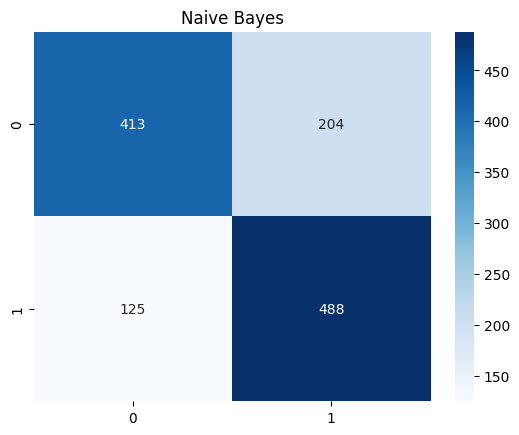

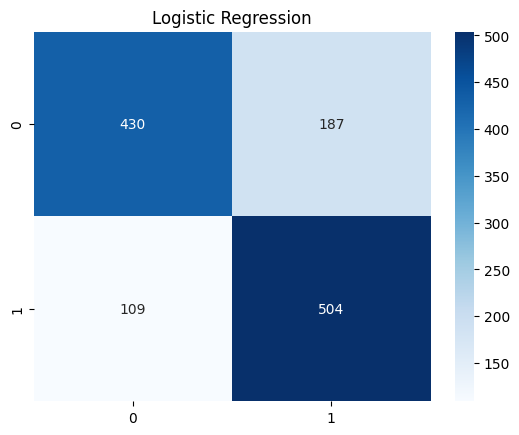

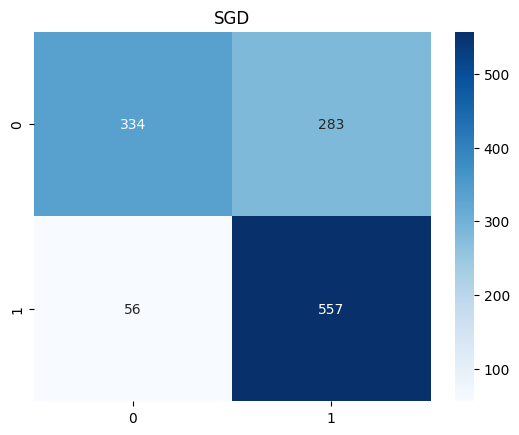

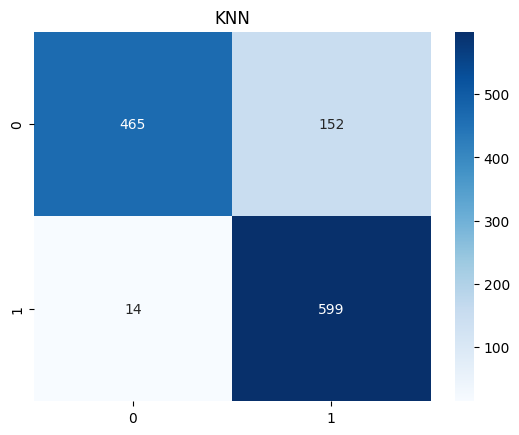

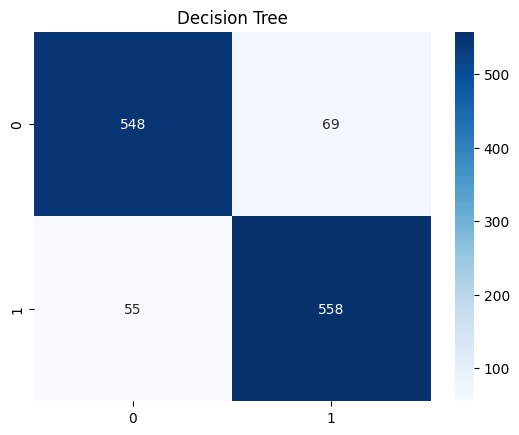

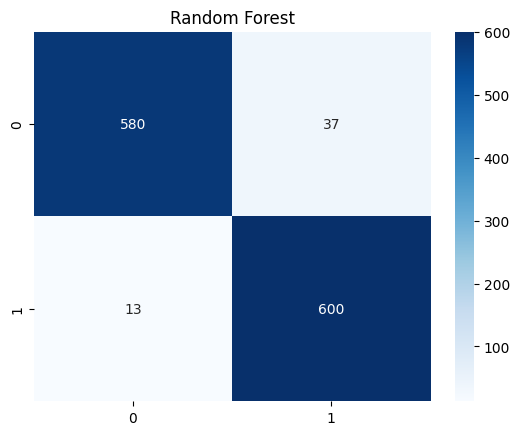

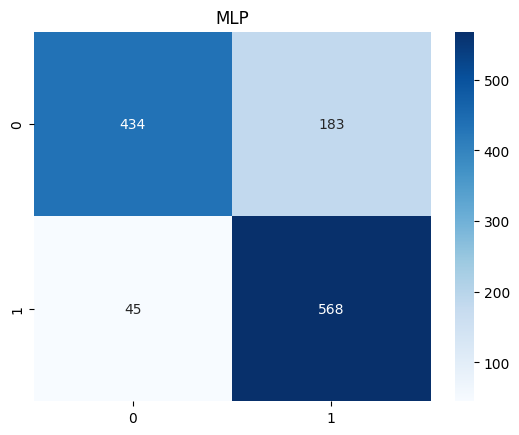

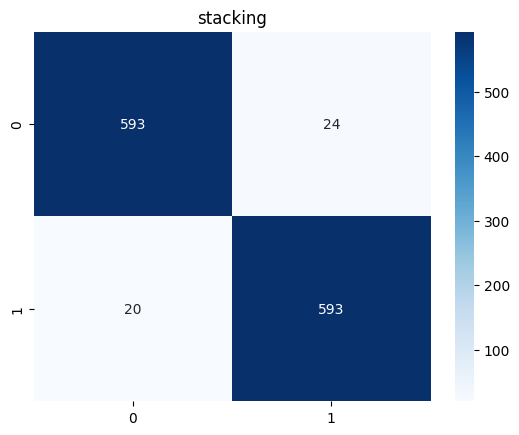

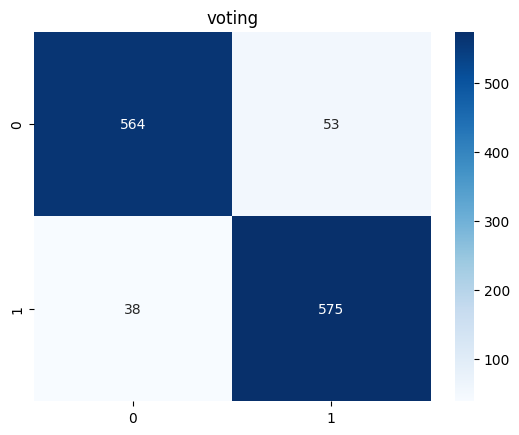

In [69]:
# Iterate through each model and its corresponding confusion matrix in the dictionary
for k, m in confusion_matrices.items():
    plt.figure()  # Create a new figure for each heatmap
    plt.title(k)  # Set the title of the plot to the model's name
    sns.heatmap(m, annot=True, fmt='d', cmap='Blues') # Plot the confusion matrix as a heatmap with annotations

Text(0.5, 1.0, 'AUC')

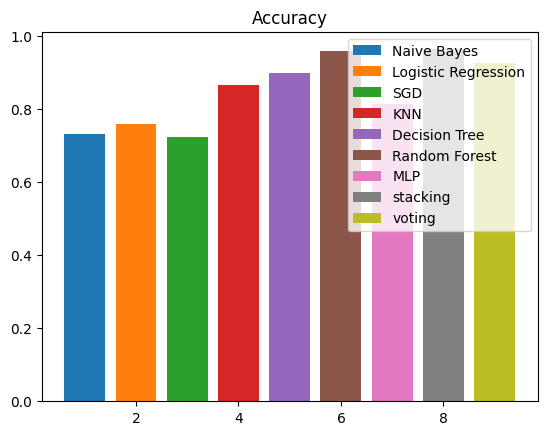

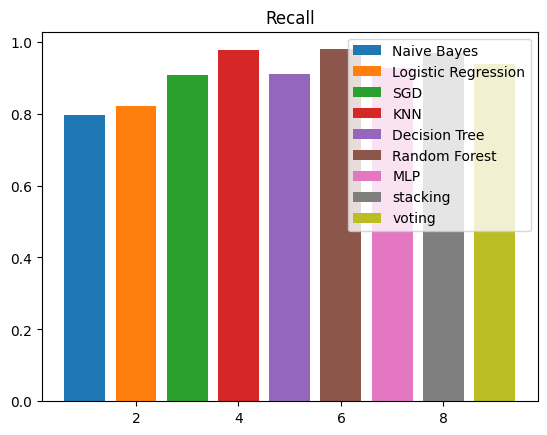

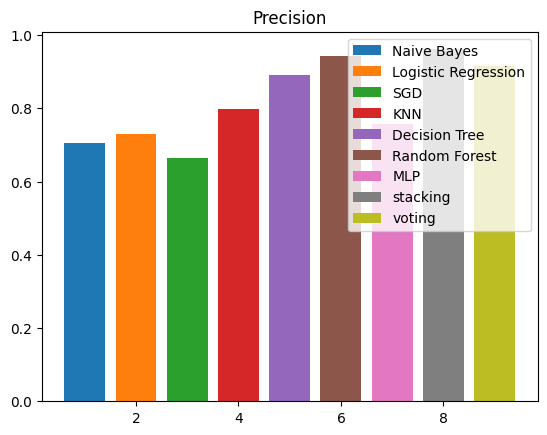

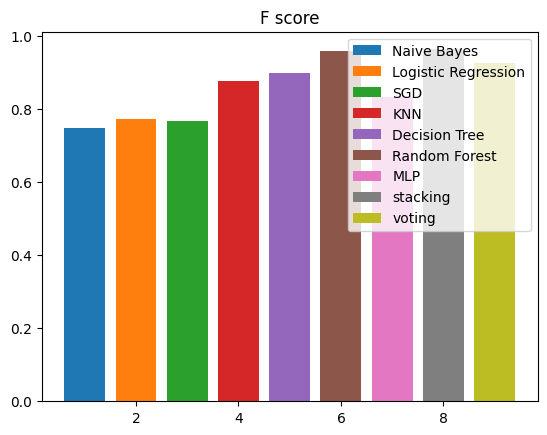

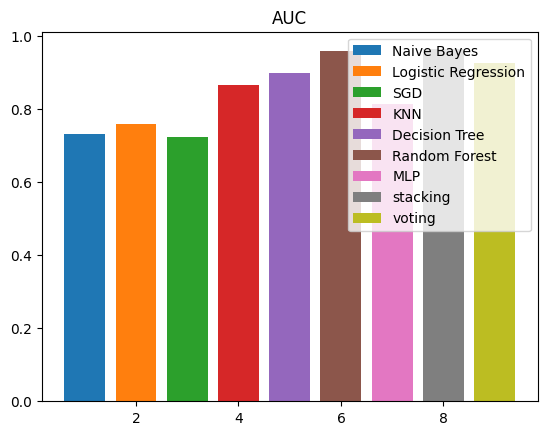

In [70]:
## Accuracy
plt.figure()  # Create a new figure for the accuracy plot
i=1
for k, v in accuracy.items():
    plt.bar(i, v, label = k)  # Plot a bar for each model's accuracy
    i+=1

plt.legend()
plt.title("Accuracy")

## Recall
plt.figure()  # Create a new figure for the recall plot
i=1
for k, v in recall.items():
    plt.bar(i, v, label = k)  # Plot a bar for each model's recall
    i+=1

plt.legend()
plt.title("Recall")

## Precision
plt.figure()  # Create a new figure for the precision plot
i=1
for k, v in precision.items():
    plt.bar(i, v, label = k)  # Plot a bar for each model's precision
    i+=1

plt.legend()
plt.title("Precision")

## F score
plt.figure()  # Create a new figure for the F-score plot
i=1
for k, v in F_metric.items():
    plt.bar(i, v, label = k)  # Plot a bar for each model's F-score
    i+=1

plt.legend()
plt.title("F score")

## AUC
plt.figure()  # Create a new figure for the AUC plot
i=1
for k, v in auc_score.items():
    plt.bar(i, v, label = k)  # Plot a bar for each model's AUC score
    i+=1

plt.legend()
plt.title("AUC")

<Axes: >

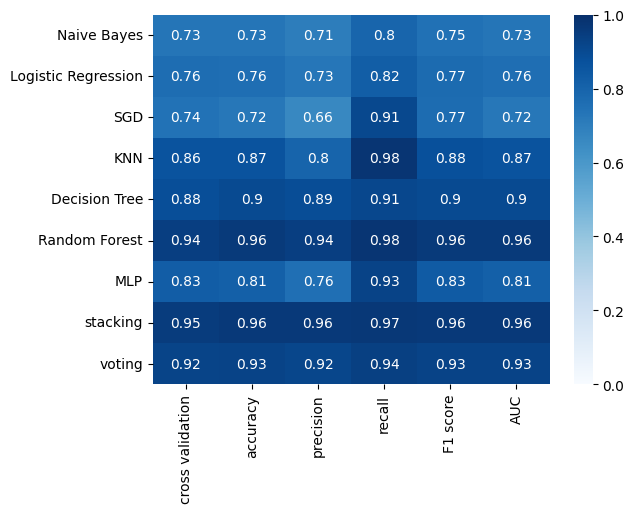

In [71]:
# Initialize a dictionary to store metrics for each model
model_matrix = dict()

for k in models.keys(): # Iterate over each model in the 'models' dictionary
    model_matrix[k] = list()  # Initialize a list to store metrics for the current model
    model_matrix[k].append(cross_val_scores_mean[k])  # Add cross-validation score to the list
    model_matrix[k].append(accuracy[k]) # Add accuracy score to the list
    model_matrix[k].append(precision[k])  # Add precision score to the list
    model_matrix[k].append(recall[k]) # Add recall score to the list
    model_matrix[k].append(F_metric[k]) # Add F1 score to the list
    model_matrix[k].append(auc_score[k])  # Add AUC score to the list

# Create a DataFrame from the model_matrix dictionary
matrix = pd.DataFrame(model_matrix, index=['cross validation', 'accuracy', 'precision', 'recall', 'F1 score', 'AUC']).T

# Plot a heatmap of the DataFrame
sns.heatmap(matrix, annot = True, vmin=0, vmax=1, cmap='Blues')

As in the paper, the stacking model under the selected base models is the most efficient in all metrics under consideration, except for the recall, where 3-NN has the higher value equal to 98%, against the 97% of the stacking method. Similarly, high values were achieved by the Random Forest and majority voting classifiers.